In [113]:
import numpy as np
import pandas as pd

In [114]:
movies = pd.read_csv(r"C:\Users\rajath.k\Downloads\movie_data\movies.csv")
ratings = pd.read_csv(r"C:\Users\rajath.k\Downloads\movie_data\ratings.csv")
links = pd.read_csv(r"C:\Users\rajath.k\Downloads\movie_data\links.csv")
tags = pd.read_csv(r"C:\Users\rajath.k\Downloads\movie_data\tags.csv")
#data.shape


In [115]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [116]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [117]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [118]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [119]:
len(ratings.userId.unique())

610

In [120]:
maxi = ratings.rating.max()

In [121]:
max_ratings = ratings[ratings.rating == maxi].movieId

318 in max_userid

True

In [122]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [123]:
movies[movies.title == 'Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [124]:
tags[tags.movieId == 2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [125]:
print(movies[movies.title == 'Terminator 2: Judgment Day (1991)'])


ratings[ratings.movieId == 589].rating.mean()

     movieId                              title         genres
507      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi


3.970982142857143

In [126]:
print(len(ratings[ratings.movieId == 356].rating)) #forestgump
print(len(ratings[ratings.movieId == 318].rating)) #shawshank
print(len(ratings[ratings.movieId == 2571].rating)) #matrix
print(len(ratings[ratings.movieId == 296].rating)) #pulpfiction

329
317
278
307


In [127]:
print(movies[movies.title == 'Fight Club (1999)'])
fightclub_rating = ratings[ratings.movieId == 2959].rating
ratings[ratings.movieId == 2959]

      movieId              title                       genres
2226     2959  Fight Club (1999)  Action|Crime|Drama|Thriller


,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


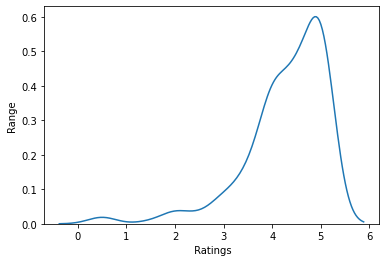

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot
sns.kdeplot(fightclub_rating)

plt.xlabel(' Ratings')
plt.ylabel('Range')

plt.show()

In [131]:
# Mandatory 1

In [181]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [179]:
movie_grp = ratings.groupby('movieId')

#type(movie_grp)

#movie_grp = pd.DataFrame(movie_grp)
print(type(movie_grp))
print(type(movies))

grp_column = list(movie_grp.obj.columns)
movie_grp.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100823,610,160836,3.0,1493844794
100825,610,161634,4.0,1493848362
100827,610,163937,3.5,1493848789
100828,610,163981,3.5,1493850155


In [182]:
movie_grp = pd.DataFrame(movie_grp)
movie_grp.tail()

,0,1
9719,193581,userId movieId rating timestamp 272...
9720,193583,userId movieId rating timestamp 272...
9721,193585,userId movieId rating timestamp 272...
9722,193587,userId movieId rating timestamp 272...
9723,193609,userId movieId rating timestamp 513...


In [ ]:
mov_rat_injoin = pd.merge(movie_grp, movies, on='movieId', how='inner')

In [183]:
# questions

In [190]:
print(movies[movies.title == 'Godfather, The (1972)'])
print(ratings[ratings.movieId == 858].rating.mean()) #Godfather
print(movies[movies.title == 'Shawshank Redemption, The (1994)'])
print(ratings[ratings.movieId == 318].rating.mean()) #Shawshank Redemption, The (1994)
print(movies[movies.title == 'Jumanji (1995)'])
print(ratings[ratings.movieId == 2].rating.mean()) #Godfather
print(movies[movies.title == 'Wolf of Wall Street, The (2013)'])
print(ratings[ratings.movieId == 106782].rating.mean()) #Godfather

     movieId                  title       genres
659      858  Godfather, The (1972)  Crime|Drama
4.2890625
     movieId                             title       genres
277      318  Shawshank Redemption, The (1994)  Crime|Drama
4.429022082018927
   movieId           title                      genres
1        2  Jumanji (1995)  Adventure|Children|Fantasy
3.4318181818181817
      movieId                            title              genres
8305   106782  Wolf of Wall Street, The (2013)  Comedy|Crime|Drama
3.9166666666666665


In [274]:
#2 question

,userId,rating,timestamp
movieId,,,
356,329,329,329
318,317,317,317
296,307,307,307
593,279,279,279
2571,278,278,278


In [256]:
# no of user ratings
print(movies[movies.title == 'Pulp Fiction (1994)'])
print(len(ratings[ratings.movieId == 296].rating))

print(movies[movies.title == 'Bad Boys (1995)'])
print(len(ratings[ratings.movieId == 145].rating))

print(movies[movies.title == 'Silence of the Lambs, The (1991)'])
print(len(ratings[ratings.movieId == 593].rating))

print(movies[movies.title == 'Matrix, The (1999)'])
print(len(ratings[ratings.movieId == 2571].rating))

     movieId                title                       genres
257      296  Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller
307
     movieId            title                              genres
118      145  Bad Boys (1995)  Action|Comedy|Crime|Drama|Thriller
51
     movieId                             title                 genres
510      593  Silence of the Lambs, The (1991)  Crime|Horror|Thriller
279
      movieId               title                  genres
1939     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller
278


In [275]:
rating_grp = ratings.groupby('movieId').count().sort_values('userId', ascending=False)
# a = rating_grp.movieId
# list(a)
#print(type(rating_grp))
# df = pd.DataFrame({'movieId': list(a),
#                 'rating': list(rating_grp.rating)})
#rating_grp = rating_grp.sort_values(ascending=False)
rating_grp.head()
# df.head()

,userId,rating,timestamp
movieId,,,
356,329,329,329
318,317,317,317
296,307,307,307
593,279,279,279
2571,278,278,278


In [276]:
#3 question

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [308]:
genre_list = []
for gen in movies.genres:
    if 'sci' in gen.lower():
        genre_list.append(gen)
        
print(len(genre_list))

# for gen in movies.genres:
#     if 'sci' in gen.lower():
#         print(gen)

980


In [315]:
scif = movies[movies.genres.str.contains('Sci-Fi')].movieId


pandas.core.series.Series

In [317]:
pop_scifi = pd.merge(rating, scif, on='movieId', how='inner')

pop_scifi.head()

,userId,movieId,rating,timestamp
0,1,260,5.0,964981680
1,4,260,5.0,945079259
2,7,260,5.0,1106635933
3,15,260,5.0,1510571946
4,16,260,3.0,1377476936


In [319]:
scifi_grp = pop_scifi.groupby('movieId').count().sort_values('userId', ascending=False)

scifi_grp.head()

,userId,rating,timestamp
movieId,,,
2571,278,278,278
260,251,251,251
480,238,238,238
589,224,224,224
1196,211,211,211


In [320]:
movies.loc[movies.movieId == 480]

,movieId,title,genres
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


In [ ]:
# We thought of giving you a gift this new year by sharing the web scraping script
# Understanding the script before using is always appreciated
# We left few blanks in the script for your exploration
# Make sure to replace FILL_IN_THE_BLANK in the code to make it work

import requests
import numpy as np
from bs4 import beautifulsoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = beautifulsoup(response.text)
    imdb_rating = soup.find('FILL_IN_THE_BLANK', attrs={'p', id='id_name'})
    return imdb_rating.text if imdb_rating else np.nan

In [ ]:
for iid in links.imdbid:
    scrapper(iid)


In [321]:
## Last question

print(movies[movies.title == 'Inception (2010)'])

      movieId             title  \
7372    79132  Inception (2010)   

                                               genres  
7372  Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX  
